# Bayes Theorem

In this example, we'll consider a hypothetical medical test for a disease, and we'll calculate the probability of having the disease given a positive test result.

In this example, we assume that the disease prevalence is 1% (prior probability), the test sensitivity is 90% (probability of a positive test result given the presence of the disease), and the false positive rate is 5% (probability of a positive test result given the absence of the disease). Using Bayes' theorem, we calculate the probability of having the disease given a positive test result, which is around 15.4%. This demonstrates how Bayes' theorem can be used to update our beliefs about an event based on new evidence.

In [3]:
def bayes_theorem(p_a, p_b_given_a, p_b_given_not_a):
    """
    Calculate the probability of A given B using Bayes' theorem.
    
    :param p_a: P(A), the prior probability of A
    :param p_b_given_a: P(B|A), the probability of B given A
    :param p_b_given_not_a: P(B|A'), the probability of B given not A
    :return: P(A|B), the probability of A given B
    """
    p_not_a = 1 - p_a
    p_b = p_b_given_a * p_a + p_b_given_not_a * p_not_a
    p_a_given_b = (p_b_given_a * p_a) / p_b
    return p_a_given_b

# Medical test example
# Disease prevalence (prior probability)
p_disease = 0.01

# Sensitivity: Probability of a positive test result given the presence of the disease
p_positive_given_disease = 0.9

# False positive rate: Probability of a positive test result given the absence of the disease
p_positive_given_no_disease = 0.05

# Calculate the probability of having the disease given a positive test result
p_disease_given_positive = bayes_theorem(p_disease, p_positive_given_disease, p_positive_given_no_disease)

print(f"Probability of having the disease given a positive test result: {p_disease_given_positive:.3f}")


Probability of having the disease given a positive test result: 0.154


Below code creates a bar plot that shows the probability of a positive or negative test result for each group (disease and no disease). The probability of having the disease given a positive test result (calculated using Bayes' theorem) is displayed within the blue bar for the 'Disease' group. This visualization helps learners better understand the concept of updating probabilities based on new evidence and how Bayes' theorem works in practice.

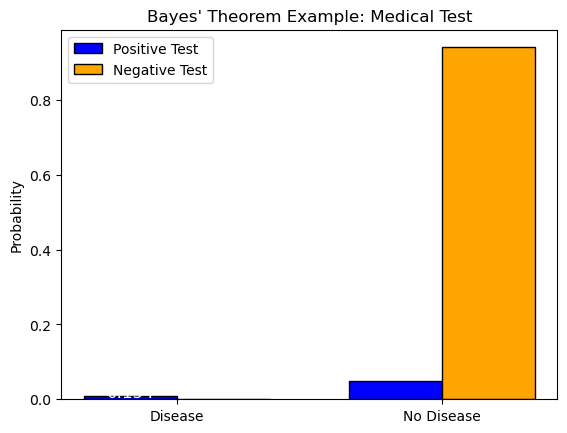

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the probabilities for each group
p_no_disease = 1 - p_disease
p_positive_given_disease_scaled = p_positive_given_disease * p_disease
p_positive_given_no_disease_scaled = p_positive_given_no_disease * p_no_disease

# Generate data for the bar plot
labels = ['Disease', 'No Disease']
positive_given = [p_positive_given_disease_scaled, p_positive_given_no_disease_scaled]
negative_given = [p_disease - p_positive_given_disease_scaled, p_no_disease - p_positive_given_no_disease_scaled]

# Create the bar plot
fig, ax = plt.subplots()

bar_width = 0.35
x = np.arange(len(labels))

ax.bar(x, positive_given, bar_width, label='Positive Test', color='blue', edgecolor='k')
ax.bar(x + bar_width, negative_given, bar_width, label='Negative Test', color='orange', edgecolor='k')

# Add text for the Bayes' theorem result
ax.text(0, p_positive_given_disease_scaled / 2, f"{p_disease_given_positive:.3f}", fontsize=12, color='white', ha='center')

# Customize the plot
ax.set_title("Bayes' Theorem Example: Medical Test")
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(labels)
ax.set_ylabel('Probability')
ax.legend()

plt.show()


In Bayesian updating, we start with a prior probability distribution, collect new data, and update our beliefs using the new information. Let's use a coin toss example to visualize Bayesian updating.

Suppose we have a coin, but we're not sure if it's fair. Our prior belief is that the probability of the coin landing heads (H) is somewhere between 0 and 1. We can represent this prior belief using a Beta distribution with parameters α (number of heads) and β (number of tails), initially set to α = 1 and β = 1, which represents a uniform distribution (equal probability for all possibilities).

Now, let's say we perform 10 coin tosses, and the coin lands heads 7 times and tails 3 times. We'll update our prior beliefs using these results:

Update the parameters of our Beta distribution based on the new data: α = 1 + 7 (number of heads) and β = 1 + 3 (number of tails).
Our updated Beta distribution now has parameters α = 8 and β = 4.

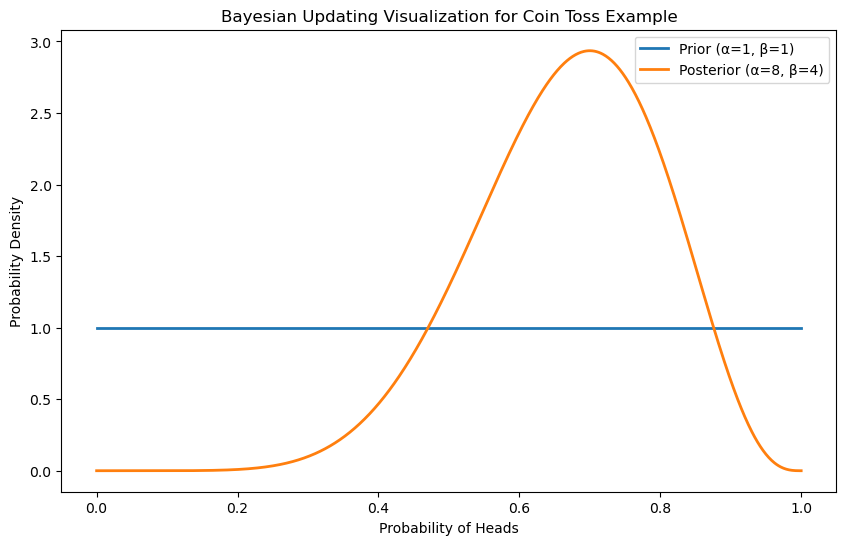

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Prior parameters (α=1, β=1)
prior_alpha = 1
prior_beta = 1

# Coin toss results: 7 heads, 3 tails
num_heads = 7
num_tails = 3

# Posterior parameters (α=8, β=4)
posterior_alpha = prior_alpha + num_heads
posterior_beta = prior_beta + num_tails

# Generate x-axis values for the plot
x = np.linspace(0, 1, 1000)

# Calculate probability density for prior and posterior distributions
prior_pdf = beta.pdf(x, prior_alpha, prior_beta)
posterior_pdf = beta.pdf(x, posterior_alpha, posterior_beta)

# Plot the prior and posterior distributions
plt.figure(figsize=(10, 6))
plt.plot(x, prior_pdf, label='Prior (α=1, β=1)', lw=2)
plt.plot(x, posterior_pdf, label='Posterior (α=8, β=4)', lw=2)
plt.xlabel('Probability of Heads')
plt.ylabel('Probability Density')
plt.legend()
plt.title('Bayesian Updating Visualization for Coin Toss Example')
plt.show()
